# Drug dataset - Sentiment Analysis 

In [2]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [3]:
df_train = pd.read_csv("data/drugsComTrain_raw.tsv", sep='\t', index_col=[0])
df_test = pd.read_csv("data/drugsComTest_raw.tsv", sep='\t', index_col=[0])
df = pd.concat([df_train, df_test]).reset_index(drop=True)
df['length'] = list(map(lambda x: len(str(x).split()), df['review']))

### Feature stats

In [4]:
df.describe()

,rating,usefulCount,length
count,215063.000000,215063.000000,215063.000000
mean,6.990008,28.001004,84.682228
std,3.275554,36.346069,44.852532
min,1.000000,0.000000,1.000000
25%,5.000000,6.000000,48.000000
50%,8.000000,16.000000,84.000000
75%,10.000000,36.000000,126.000000
max,10.000000,1291.000000,1894.000000


/opt/anaconda3/envs/OA_DA_env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='rating', ylabel='count'>

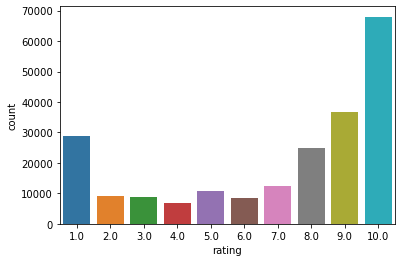

In [5]:
sns.countplot(df['rating'])

/opt/anaconda3/envs/OA_DA_env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='usefulCount', ylabel='count'>

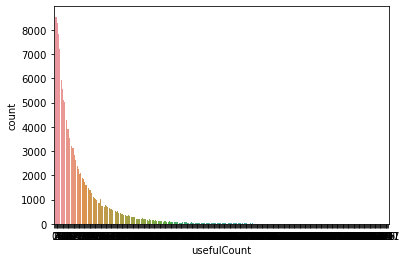

In [6]:
sns.countplot(df['usefulCount'])

<AxesSubplot:xlabel='usefulCount'>

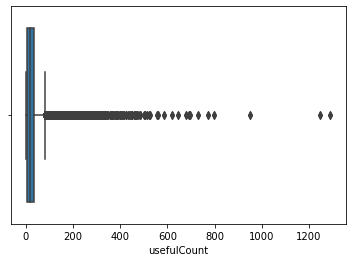

In [7]:
sns.boxplot(x=df['usefulCount'])

### keeping good quality data only

In [8]:
drugC = df.drugName.value_counts()
drugC = drugC[drugC>=5]
df = df.loc[df['drugName'].isin(drugC.index),]
condC = df.condition.value_counts()
condC = condC[condC>=5]
df = df.loc[df['condition'].isin(condC.index),]
df = df.loc[df['usefulCount']>6,]

In [9]:
df

,drugName,condition,review,rating,date,usefulCount,length
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27,17
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192,141
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17,134
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10,89
4,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37,124
...,...,...,...,...,...,...,...
215058,Tamoxifen,"Breast Cancer, Prevention","""I have taken Tamoxifen for 5 years. Side effe...",10.0,"September 13, 2014",43,97
215059,Escitalopram,Anxiety,"""I&#039;ve been taking Lexapro (escitaploprgra...",9.0,"October 8, 2016",11,130
215060,Levonorgestrel,Birth Control,"""I&#039;m married, 34 years old and I have no ...",8.0,"November 15, 2010",7,149
215061,Tapentadol,Pain,"""I was prescribed Nucynta for severe neck/shou...",1.0,"November 28, 2011",20,34


In [10]:
# Positive reviews found more useful (based on tableau graph)

In [11]:
#uc = df.usefulCount.value_counts().reset_index().rename(columns={"index": "values_c"}) 

In [12]:
#top5l = list(uc.sort_values(by="values_c",  ascending=False).reset_index(drop=True).iloc[0:5].values_c.values)

In [13]:
#df.query("usefulCount in @top5l")

In [14]:
#df.loc[df.usefulCount == df.usefulCount.max(), 'review']

In [15]:
#df.condition.unique()

### General trends in the data

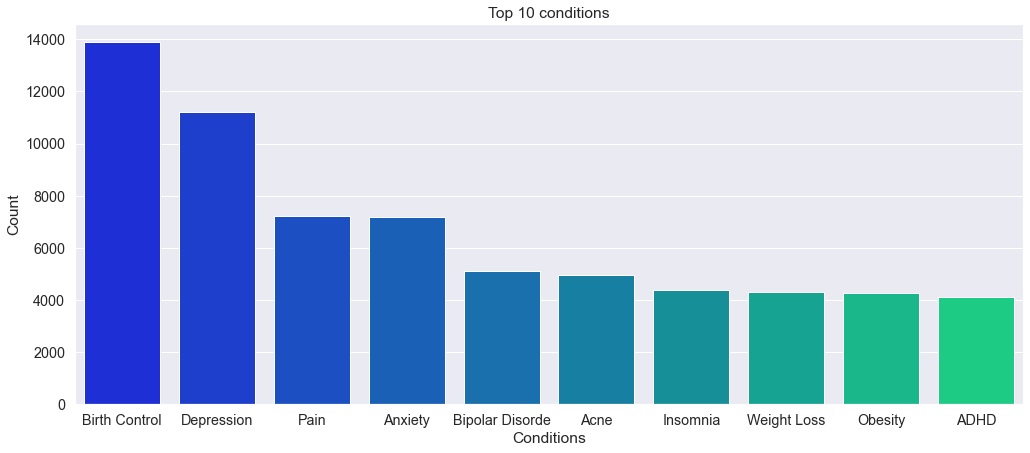

In [16]:
cond = dict(df['condition'].value_counts())
top_condition = list(cond.keys())[0:10]
values = list(cond.values())[0:10]
sns.set(style = 'darkgrid', font_scale = 1.3)
plt.rcParams['figure.figsize'] = [17, 7]

sns_ = sns.barplot(x = top_condition, y = values, palette = 'winter')
sns_.set_title("Top 10 conditions")
sns_.set_xlabel("Conditions")
sns_.set_ylabel("Count");

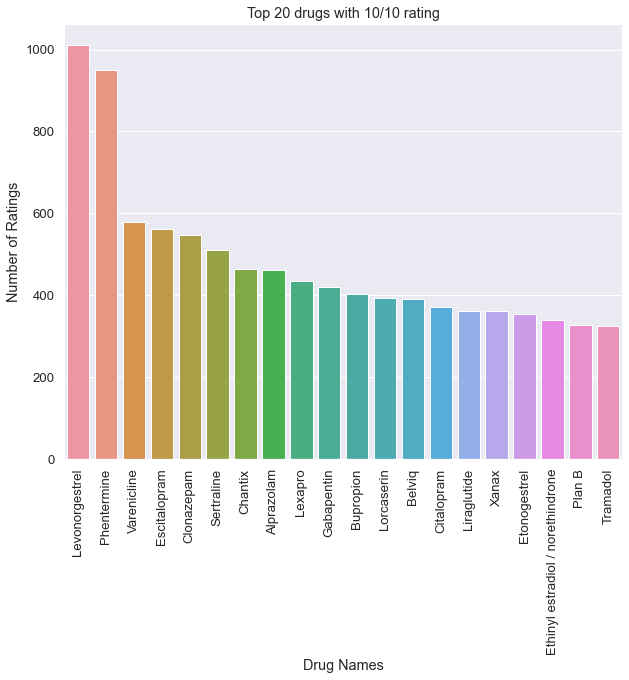

In [17]:
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [10, 8]

rating = dict(df.loc[df.rating == 10, "drugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20])

sns_rating.set_title('Top 20 drugs with 10/10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

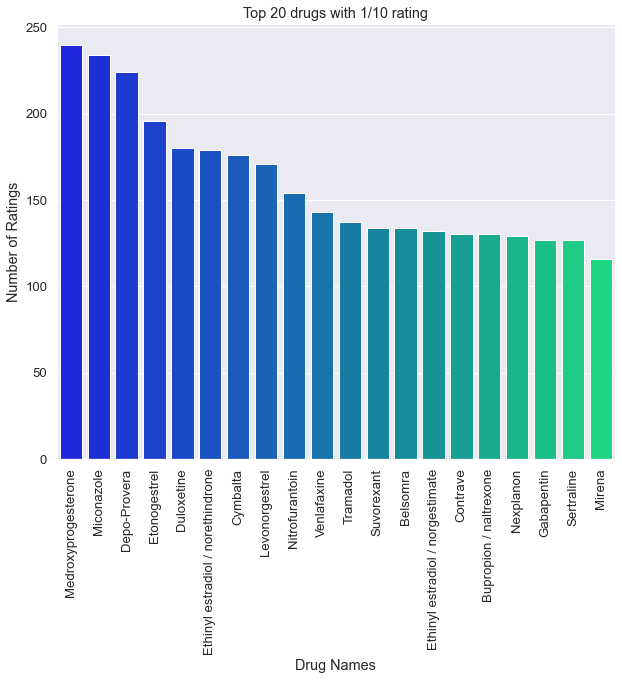

In [18]:
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [10, 8]

rating = dict(df.loc[df.rating == 1, "drugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20], palette = 'winter')

sns_rating.set_title('Top 20 drugs with 1/10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

Text(0.5, 1.0, 'Top20 : The number of drugs per condition.')

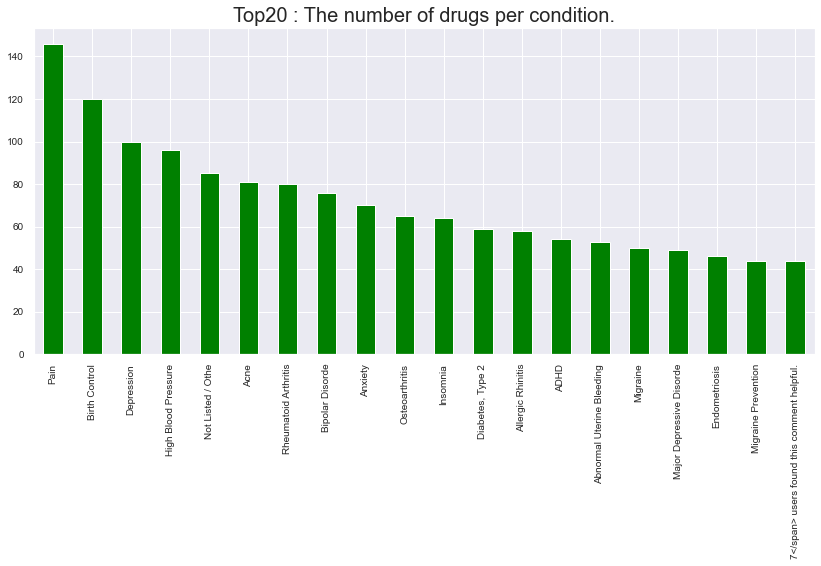

In [19]:
condition_dn = df.groupby(['condition'])['drugName'].nunique().sort_values(ascending=False)
condition_dn[0:20].plot(kind="bar", figsize = (14,6), fontsize = 10,color="green")
plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Top20 : The number of drugs per condition.", fontsize = 20)

In [20]:
df.rating.value_counts()

10.0    54986
9.0     28903
8.0     18816
1.0     17577
7.0      8766
5.0      6477
6.0      5591
2.0      5402
3.0      5143
4.0      3849
Name: rating, dtype: int64